In [ ]:
!python3 -m pip install scikit-fuzzy

In [ ]:
import numpy as np
import skfuzzy as skf
from skfuzzy import control as sys

In [ ]:
# Definição das variáveis

temperatura = sys.Antecedent(np.arange(5, 35, 0.1), 'temp')  # entrada
potencia = sys.Consequent(np.arange(0, 100, 0.1), 'pot')  # saida

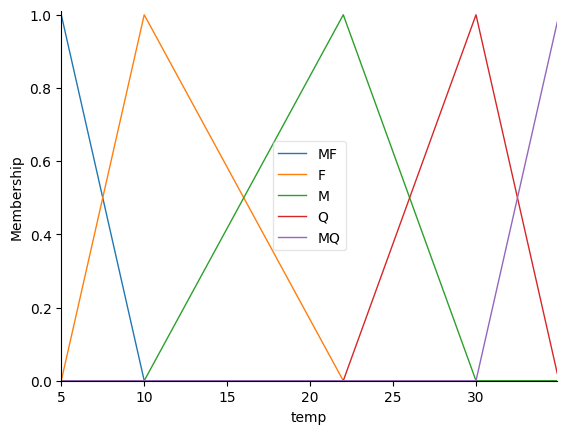

In [ ]:
# Configurando funções de pertinência da entrada

temperatura['MF'] = skf.trimf(temperatura.universe, [5, 5, 10])
temperatura['F'] = skf.trimf(temperatura.universe, [5, 10, 22])
temperatura['M'] = skf.trimf(temperatura.universe, [10, 22, 30])
temperatura['Q'] = skf.trimf(temperatura.universe, [22, 30, 35])
temperatura['MQ'] = skf.trimf(temperatura.universe, [30, 35, 35])

temperatura.view()

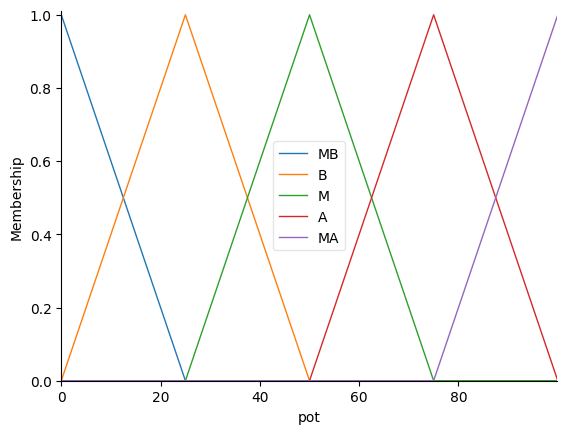

In [ ]:
# Configurando funções de pertinência da saída

potencia['MB'] = skf.trimf(potencia.universe, [0, 0, 25])
potencia['B'] = skf.trimf(potencia.universe, [0, 25, 50])
potencia['M'] = skf.trimf(potencia.universe, [25, 50, 75])
potencia['A'] = skf.trimf(potencia.universe, [50, 75, 100])
potencia['MA'] = skf.trimf(potencia.universe, [75, 100, 100])

potencia.view()

In [ ]:
# Definindo regras (Relacionando entradas com saídas)

r1 = sys.Rule(temperatura['MF'], potencia['MB'])
r2 = sys.Rule(temperatura['F'], potencia['B'])
r3 = sys.Rule(temperatura['M'], potencia['M'])
r4 = sys.Rule(temperatura['Q'], potencia['A'])
r5 = sys.Rule(temperatura['MQ'], potencia['MA'])

In [ ]:
# Definição do controlador com as regras criadas

regras = sys.ControlSystem([r1, r2, r3, r4, r5])
controlador = sys.ControlSystemSimulation(regras)

47.17739858963871


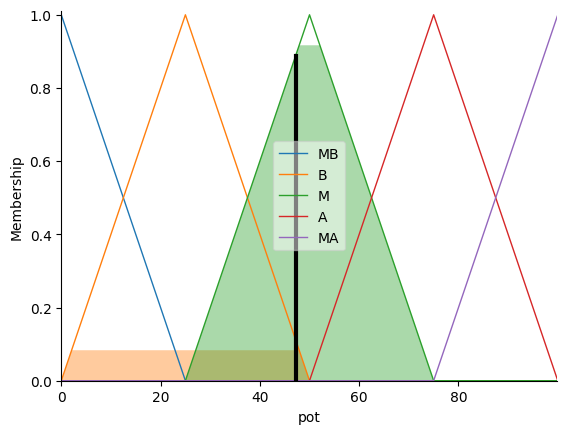

In [ ]:
# Testando modelo para um valor de temperatura

controlador.input['temp'] = 21
controlador.compute()
p = controlador.output['pot']

potencia.view(sim = controlador)
print(p)

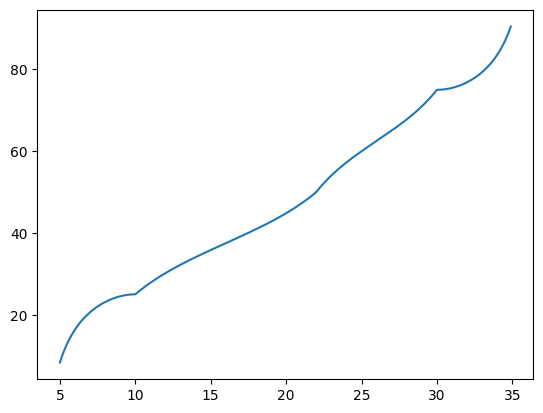

In [ ]:
# Testando modelo para uma faixa de temperatura

import matplotlib.pyplot as plt

temps = np.arange(5, 35, 0.1)
pots = list()

for c in temps:
  controlador.input['temp'] = c
  controlador.compute()
  pots.append(controlador.output['pot'])

plt.plot(temps, pots)
plt.show()